In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import random

from datetime import datetime

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
from xgboost import XGBRegressor

In [3]:
#load data

df = pd.read_csv('train.csv')
asset_label = pd.read_csv('asset_details.csv')

asset_label[asset_label['Asset_ID'] == 2]['Asset_Name']

0    Bitcoin Cash
Name: Asset_Name, dtype: object

In [4]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [8]:
#looking at bitcoin (BTC) specifically

bitcoin = df[df['Asset_ID'] == 1]
bitcoin.describe().drop('Asset_ID', axis = 1)

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target
count,1.956282e+06,1.956282e+06,1.956282e+06,1.956282e+06,1.956282e+06,1.956282e+06,1.956282e+06,1.956282e+06,1.955978e+06
mean,1.573474e+09,1.082390e+03,1.561112e+04,1.565181e+04,1.557804e+04,1.561112e+04,9.284999e+01,1.561100e+04,-1.559993e-06
std,3.390094e+07,1.601813e+03,1.512141e+04,1.513203e+04,1.510627e+04,1.512144e+04,1.554052e+02,1.512129e+04,2.013754e-03
min,1.514765e+09,1.000000e+00,3.149657e+03,3.176910e+03,3.120000e+03,3.151545e+03,1.000000e-04,3.152326e+03,-7.255649e-02
25%,1.544110e+09,2.980000e+02,6.848250e+03,6.865382e+03,6.835623e+03,6.848072e+03,3.020642e+01,6.848265e+03,-8.163170e-04
50%,1.573491e+09,5.630000e+02,9.206021e+03,9.222400e+03,9.191175e+03,9.205980e+03,5.280397e+01,9.205946e+03,-1.916906e-05
75%,1.602837e+09,1.259000e+03,1.346695e+04,1.352072e+04,1.340000e+04,1.346706e+04,9.767651e+01,1.346745e+04,7.718871e-04
max,1.632182e+09,8.747800e+04,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,1.040500e+04,6.479982e+04,9.278919e-02


In [9]:
bitcoin.drop('Asset_ID', axis =1, inplace = True)
bitcoin['datetime'] = pd.to_datetime(bitcoin['timestamp'], unit = 's')

C:\Python Jupyter\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# plt.figure(figsize = (20,10))
# sns.lineplot(x = 'datetime', y = 'Open', data = bitcoin)
# sns.lineplot(x = 'datetime', y = 'High', data = bitcoin)
# sns.lineplot(x = 'datetime', y = 'Low', data = bitcoin)

In [ ]:
# plt.figure(figsize = (20,10))
# sns.lineplot(x = 'datetime', y = 'Volume', data = bitcoin)

In [11]:
# due to the massive size of the data and the short-timescale changes in market conditions, we consider the last 3 months

bitcoin['year']= bitcoin['datetime'].dt.year
bitcoin['month']= bitcoin['datetime'].dt.month
bitcoin['day']= bitcoin['datetime'].dt.day

bitcoin_trim = bitcoin[(bitcoin['year'] >= 2021) & (bitcoin['month'] > 8)]

C:\Python Jupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python Jupyter\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Python Jupyter\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [12]:
print(bitcoin_trim.shape)

(28800, 13)


In [ ]:
# plt.figure(figsize = (20,10))
# sns.lineplot(x = 'datetime', y = 'Open', data = bitcoin_trim)
# sns.lineplot(x = 'datetime', y = 'High', data = bitcoin_trim)
# sns.lineplot(x = 'datetime', y = 'Low', data = bitcoin_trim)

C:\Python Jupyter\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


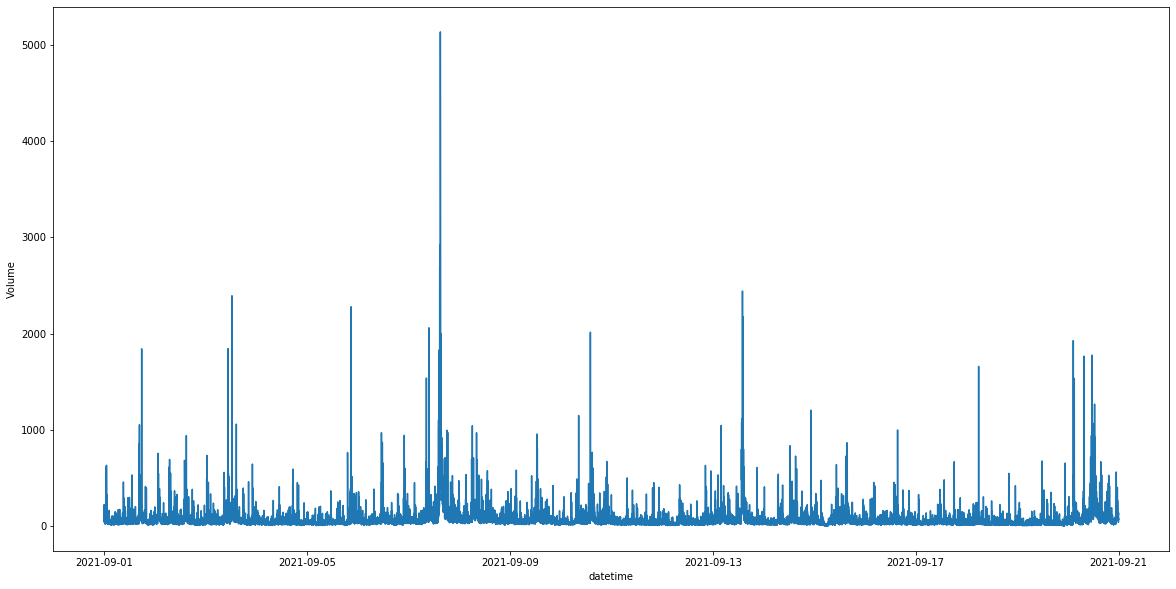

In [13]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'datetime', y = 'Volume', data = bitcoin_trim)

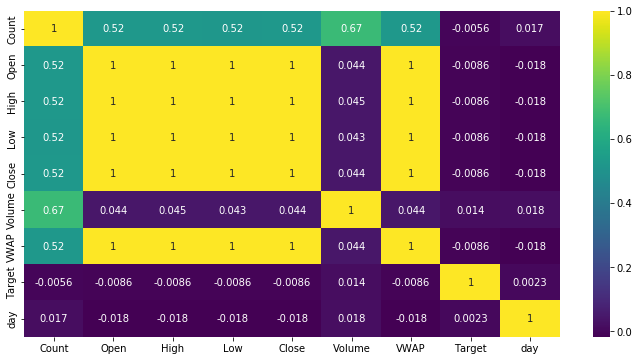

In [14]:
# 
plt.figure(figsize = (12,6))
# looking at the correlation map of individual features but it seems everything is correct
sns.heatmap(bitcoin.drop(['year', 'timestamp','datetime', 'month'], axis = 1).corr(), annot = True, cmap = 'viridis')


In [15]:
# dropping the null values
bitcoin_trim.isnull().sum()
bitcoin_trim = bitcoin_trim.dropna()

In [ ]:
# sns.pairplot(bitcoin_trim, hue = 'month', vars=['Volume','Count','VWAP','Target'])

In [ ]:
#expanding visualizations to all 14 cryptocurrencies for July 2021 to the end of the dataset

In [16]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit = 's')

df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day

#new training datafile
data = df[(df['year'] >= 2021) & (df['month'] > 6)]
data = data.dropna()

In [17]:
stock = asset_label.sort_values(by = ['Asset_Name']).Asset_Name.unique()

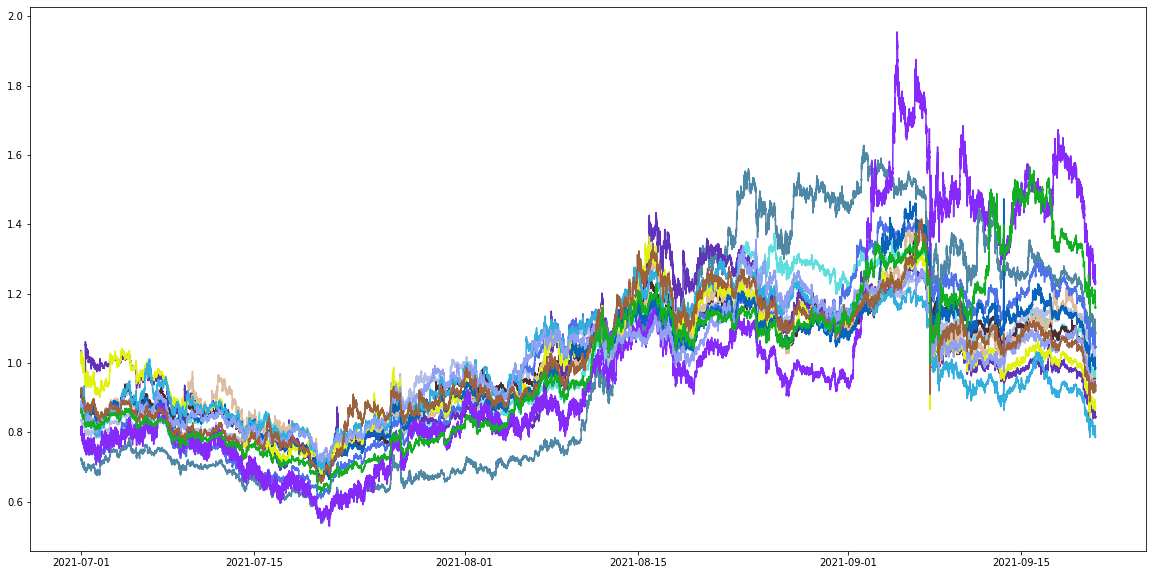

In [19]:
#visualizations of open, close, and high prices for all of the cryptocurrencies

#Average Open for all cryptocurrencies co-plotted

plt.figure(figsize = (20,10))
for i in range(0,14):
    dat=data[data['Asset_ID']==i]
    nrmlz= dat['Open'].mean()
    dat.insert(14, 'Avg_Open', dat['Open'].div(nrmlz))
    plt.plot('datetime','Avg_Open', data = dat ,color="#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))

In [ ]:
#Open for each cryptocurrency

plt.figure(figsize = (30, 26))
plt.subplots_adjust(hspace=0.5)
plt.title("Daily Open prices", fontsize=18, y=0.95)
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

Column  = 'Open'
for i in range(0,14):
    ax = plt.subplot(7, 2, i + 1)
    dat = data[data['Asset_ID'] == i]
    ax.set_title(Column + ' Price History for ' + stock[i] )
    ax.plot('datetime',Column, data = dat ,color="#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))
    ax.set_xlabel('Date')
    ax.set_ylabel(Column + ' for ' + stock[i] )#, fontsize=18)

In [ ]:
#Close for each cryptocurrency

plt.figure(figsize = (30, 26))
plt.subplots_adjust(hspace=0.5)
plt.title("Daily Close prices", fontsize=18, y=0.95)
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

Column  = 'Close'
for i in range(0,14):
    ax = plt.subplot(7, 2, i + 1)
    dat = data[data['Asset_ID'] == i]
    ax.set_title(Column + ' Price History for ' + stock[i] )
    ax.plot('datetime',Column, data = dat ,color="#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))
    ax.set_xlabel('Date')
    ax.set_ylabel(Column + ' for ' + stock[i] )#, fontsize=18)

In [ ]:
#High for each cryptocurrency

plt.figure(figsize = (30, 26))
plt.subplots_adjust(hspace=0.5)
plt.title("Daily Open prices", fontsize=18, y=0.95)
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

Column  = 'High'
for i in range(0,14):
    ax = plt.subplot(7, 2, i + 1)
    dat = data[data['Asset_ID'] == i]
    ax.set_title(Column + ' Price History for ' + stock[i] )
    ax.plot('datetime',Column, data = dat ,color="#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))
    ax.set_xlabel('Date')
    ax.set_ylabel(Column + ' for ' + stock[i] )#, fontsize=18)

In [ ]:
# sns.pairplot(data, hue = 'month', vars = ['Volume', 'Count', 'VWAP', 'Target'])

In [ ]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit = 's')

df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day

#new training datafile
data = df[(df['year'] >= 2021) & (df['month'] > 1)]
data = data.dropna()


# looking at the VWAP chart for EDA
plt.figure(figsize = (20, 60))
plt.subplots_adjust(hspace=0.5)
plt.title("Daily Open prices", fontsize=18, y=0.95)
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


Column = 'VWAP'
for i in range(0,14):
    ax = plt.subplot(7, 2, i + 1)
    dat = data[data['Asset_ID'] == i]
    ax.set_title(Column + ' for ' + stock[i] )
    sns.boxplot(x = 'month',y = Column, data = dat)
    ax.set_xlabel('month')
    ax.set_ylabel(Column + ' for ' + stock[i] )#, fontsize=18)


In [ ]:
#there are distinct correlations among the features and among the different cryptocurrencies

In [25]:
bitcoin_trim.drop('datetime', axis = 1, inplace =True)

In [26]:
# we need to do moving average since by minute the data is too large for a good fitting process

# implementing moving average using

# every one hour
moving_avg = bitcoin_trim.rolling(window = 30).mean()

moving_avg.dropna(axis = 0, inplace =True)

In [27]:
moving_avg.head()

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target,year,month,day
23834073,1.630455e+09,2442.700000,47065.616709,47119.407777,47003.867333,47061.245762,81.099274,47062.095238,-0.000007,2021.0,9.0,1.0
23834087,1.630455e+09,2415.300000,47062.580614,47117.627777,47000.741333,47059.020477,81.465627,47059.621176,0.000018,2021.0,9.0,1.0
23834101,1.630455e+09,2304.600000,47060.202234,47114.863000,47001.310667,47060.068639,78.354142,47059.203330,0.000022,2021.0,9.0,1.0
23834115,1.630456e+09,2173.066667,47062.057442,47116.151000,47005.419667,47063.316776,74.498393,47062.419317,0.000050,2021.0,9.0,1.0
23834129,1.630456e+09,2106.066667,47064.692833,47114.634333,47008.106333,47061.716252,71.402495,47063.177357,0.000105,2021.0,9.0,1.0


In [28]:
moving_avg['datetime'] = pd.to_datetime(df['timestamp'], unit = 's')

moving_avg['month'] = df['datetime'].dt.month
moving_avg['year'] = df['datetime'].dt.year
moving_avg['day'] = df['datetime'].dt.day
moving_avg['hour'] = df['datetime'].dt.hour


#new training datafile
# moving_avg = df[(df['year'] >= 2021) & (df['month'] > 6)]
# moving_avg = data.dropna()

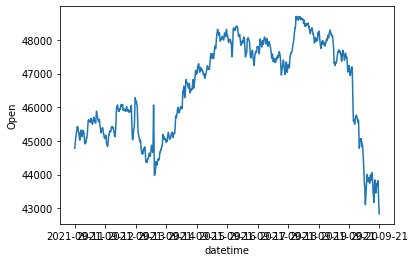

In [29]:
dd = moving_avg[(moving_avg['month'] == 9) & (moving_avg['year'] == 2021) & (moving_avg['day'] > 10)]


([<matplotlib.axis.XTick at 0x199485d6438>,
 <a list of 4 Text xticklabel objects>)

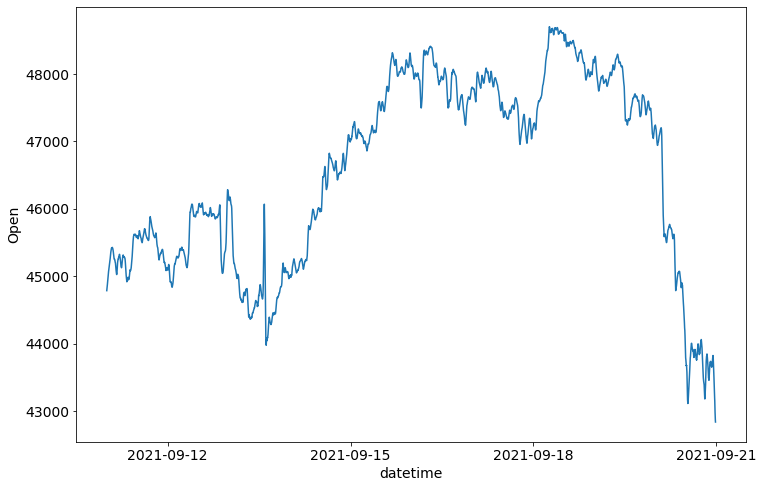

In [95]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'datetime', y = 'Open', data = dd)
plt.xticks(['2021-09-12', '2021-09-15', '2021-09-18', '2021-09-21'])


In [ ]:
plt.figure(figsize = (20,10))

dat = bitcoin_trim
# plt.plot('timestamp','Open', data = dat.iloc[10000:20000] ,color="#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))
# plt.plot('timestamp','Open', data = moving_avg.iloc[10000:20000] ,color="#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))

plt.plot('timestamp','Open', data = dat ,color='b',label = 'raw')
plt.plot('timestamp','Open', data = moving_avg.iloc[0:-1:5] ,color='r', label = 'average every 5 minutes')

plt.legend()
plt.xlabel('timestamp')
plt.ylabel('Open Price')

In [ ]:
# looking at the volitality as a function of time
plt.figure(figsize = (20,10))

dat = bitcoin_trim
dat = bitcoin_trim[bitcoin_trim['month'] >7]
# the standard deivation is no more than 
plt.plot(dat['timestamp'],dat['Open'].pct_change().rolling(390).std()*np.sqrt(390),color='b',label = 'raw')

plt.legend()
plt.xlabel('timestamp')
plt.ylabel('Standard deivation of the percentage change')
plt.title('STD of the daily change')


print('the average percentage change per day is ', pd.Series.mean(dat['Open'].pct_change().rolling(390).std()*np.sqrt(390)))



In [30]:
# the averaging looks reasonable and we are taking every 2 minutes out and until June
moving_avg = moving_avg[(moving_avg['month'] == 9) & (moving_avg['year'] == 2021) & (moving_avg['day'] >10)]
# moving_avg.drop(['year', 'month', 'day', 'datetime'], axis = 1, inplace = True)

In [31]:
testing15min = moving_avg.iloc[-15:]
moving_avg2 = moving_avg.iloc[:-15]

In [32]:
moving_avg['day'].unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype=int64)

In [33]:
# We need to make features, such as time(t-1), time(t-2) so that those are features in our data matrix

# this is a conversion from time series to more features: This code is taken from:
# https://machinelearningmastery.com/xgboost-for-time-series-forecasting/

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg#.values

cols=['Volume', 'VWAP','Open','Target']


data_series = moving_avg2[cols].to_numpy()

# basically this is to go forward 2 days forward steps and go back 1 week back
val = series_to_supervised(data_series, n_in = 100, n_out = 10)

# 
print('the size of our data matrix is: ', val.shape)

the size of our data matrix is:  (14261, 440)


In [34]:
# Since the data is multi-output (predict count, volumn, vwap, and open) we need to use the skelarning multioutput regressor
# This wraps the xgboost

from sklearn.multioutput import MultiOutputRegressor


In [35]:
data = val.values

In [36]:
# since the features are all in columns of 0+3(t) then we need to split them and then 

# when performing XGboosting or any ML model, we can use all the date point plus the 2 extra points on the right of the data matrix
#Since those variables are known and well correlated with the price of the stock.

# the prediction is just the forward step
def XG_fit(train, testX, num, estima):    
    # split into input and output columns
    n,p = train.shape
    trainX, trainy = train[:, :p-num], train[:, p-num:]
    # fit model
    model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', n_estimators=estima))
    model.fit(trainX, trainy)
    # make a one-step prediction
#     print(testX.shape)
    pred = model.predict(testX)
    return pred


In [37]:
import time 

In [38]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

train, test = train_test_split(val.values, 5)

In [ ]:
# data = val.values


# n,p = data.shape

# xdata = data[:-1, :]
# ydata = data[-1:, :-3]

# t = time.time()
# pred = XG_fit(xdata, ydata, 3)
# elapsed = time.time() - t

In [ ]:
# pred

In [ ]:
moving_avg[cols].iloc[-1:]

In [ ]:
# elapsed

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
# the prediction is just the forward step
def XG_fit(train, testX, num, estima):    
    # split into input and output columns
    n,p = train.shape
    trainX, trainy = train[:, :p-num], train[:, p-num:]
    # fit model
    model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', n_estimators=estima))
    model.fit(trainX, trainy)
    # make a one-step prediction
#     print(testX.shape)
    pred = model.predict(testX)
    return pred


# walk-forward validation for multi-variate data
def walk_forward_validation(data, n_test, columns, estmia):
    '''
    data is the raw data that is composed
    n_test is the minutes out that we are looking forward to
    columns: column values we are interested in
    
    '''
    
    p = len(columns)
    
    predictions = []
    testset = []

    # split dataset
    train, test = train_test_split(data, n_test)


    # seed history with training dataset
    history = train #[x for x in train]
    # step over each time-step in the test set
    for i in range(n_test):


        # split test row into input and output columns
        testX, testy = test[i, :-p].reshape(1,-1), test[i,-p:].reshape(1,-1)
        # fit model on history and make a prediction
        yhat = XG_fit(history, testX, p,estmia)
#         print(yhat.shape)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history = np.append(history, test[i].reshape(1,-1), axis = 0)
        # summarize progress
        testset.append(testy)

    # estimate prediction error
    y_pred = np.array(predictions).reshape(n_test,-1)
    y_true = np.array(testset).reshape(n_test,-1)
    error = mean_squared_error(y_true[:,-1], y_pred[:,-1])
    return error, y_pred, y_true




In [41]:
t = time.time()
err, y_pred, y_true = walk_forward_validation(data, 10, cols, 176)
elapsed = time.time() - t


# n_test =  2

# p = len(cols)

# predictions = []
# testset = []

# # split dataset
# train, test = train_test_split(data, n_test)


# # seed history with training dataset
# history = train #[x for x in train]
# # step over each time-step in the test set
# for i in range(n_test):


#     # split test row into input and output columns
#     testX, testy = test[i, :-p].reshape(1,-1), test[i,-p:].reshape(1,-1)
#     print(testX.shape)
#     print(testy.shape)
#     # fit model on history and make a prediction
#     yhat = XG_fit(history, testX, p)
#     print(yhat.shape)
#     # store forecast in list of predictions
#     predictions.append(yhat)
#     # add actual observation to history for the next loop
#     history = np.append(history, test[i].reshape(1,-1), axis = 0)
#     print(testy)
#     # summarize progress
#     testset.append(testy)

# #         print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
# # estimate prediction error
# y_pred = np.array(predictions).reshape(n_test,-1)
# y_true = np.array(testset).reshape(n_test,-1)
# error = mean_squared_error(y_true[:,-1], y_pred[:,-1])
# return error, y_pred, y_true

In [42]:
elapsed/60

41.39007509152095

In [ ]:
# y_pred = np.array(predict).reshape(n_test,-1)
# y_true = np.array(testset).reshape(n_test,-1)

print(y_pred[:,-1])
print(y_true[:,-1])
# print(y_true)

mean_squared_error(y_true[:,-1], y_pred[:,-1])

In [122]:
moving_avg.head()

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target,year,month,day,datetime,hour
24035252,1.631318e+09,1911.733333,44783.982619,44816.187844,44754.743333,44789.837971,52.079755,44785.252521,-0.000037,2021,9,11,2021-09-11 00:00:00,0
24035266,1.631318e+09,1969.166667,44789.249059,44823.921511,44760.019333,44797.222322,53.882436,44791.542592,-0.000049,2021,9,11,2021-09-11 00:01:00,0
24035280,1.631318e+09,2112.400000,44797.280649,44834.739844,44765.672000,44802.414209,63.551305,44800.634511,-0.000032,2021,9,11,2021-09-11 00:02:00,0
24035294,1.631318e+09,2176.233333,44801.992905,44837.343844,44767.837667,44803.725308,67.072089,44803.281873,-0.000051,2021,9,11,2021-09-11 00:03:00,0
24035308,1.631318e+09,2237.533333,44803.159030,44837.620844,44766.928333,44803.471945,70.098434,44802.688429,-0.000050,2021,9,11,2021-09-11 00:04:00,0


In [ ]:
test[:,-1], prediction[:,-1]

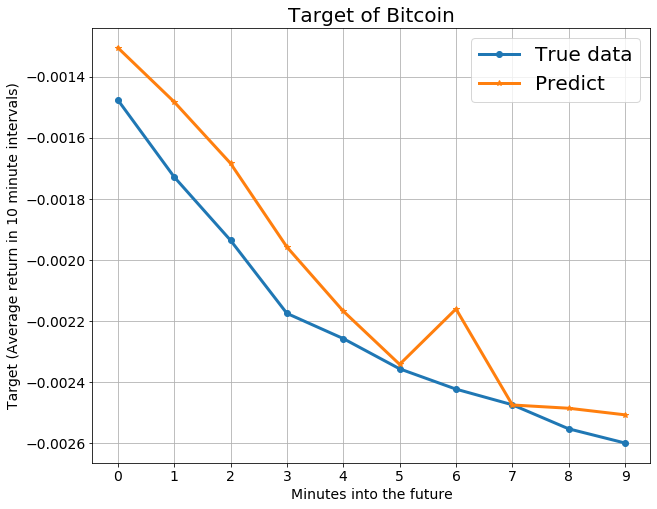

In [82]:
plt.figure(figsize = (10,8))


plt.plot(y_true[:,-1], '-o', label = 'True data', linewidth = 3)
plt.plot(y_pred[:,-1],'-*', label = 'Predict',linewidth = 3)
plt.xlabel('Minutes into the future')
plt.ylabel('Target (Average return in 10 minute intervals)')
plt.rc('axes', labelsize = 14)
plt.xticks(range(0,10))
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.grid(True)
plt.title('Target of Bitcoin', fontsize = 20)
plt.legend(fontsize = 20)


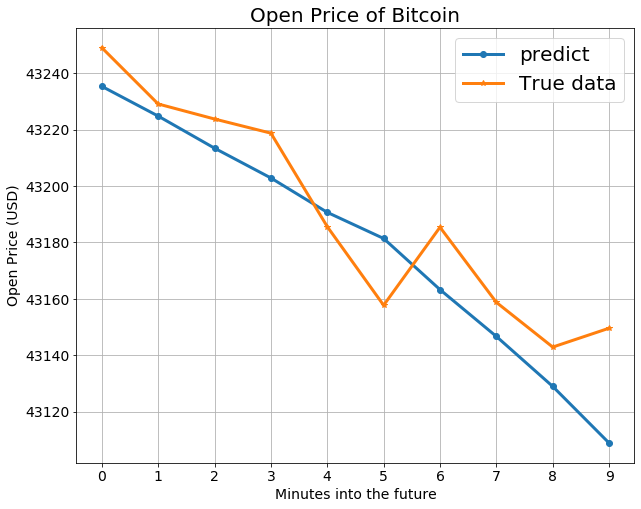

In [84]:
plt.figure(figsize = (10,8))
plt.plot(y_true[:,-2], '-o', label = 'True data', linewidth = 3)
plt.plot(y_pred[:,-2],'-*', label = 'Predict',linewidth = 3)
plt.xlabel('Minutes into the future')
plt.ylabel('Open Price (USD)')
plt.rc('axes', labelsize = 14)
plt.xticks(range(0,10))
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.grid(True)
plt.title('Open Price of Bitcoin', fontsize = 20)
plt.legend(fontsize = 20)

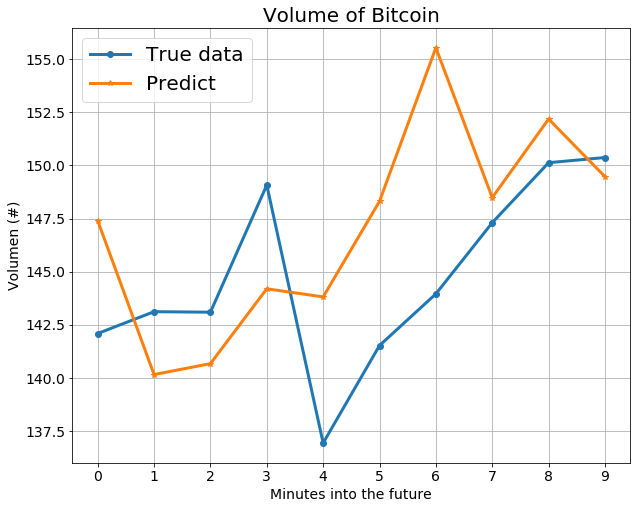

In [87]:
plt.figure(figsize = (10,8))
plt.plot(y_true[:,-4], '-o', label = 'True data', linewidth = 3)
plt.plot(y_pred[:,-4],'-*', label = 'Predict',linewidth = 3)
plt.xlabel('Minutes into the future')
plt.ylabel('Volumen (#)')
plt.rc('axes', labelsize = 14)
plt.xticks(range(0,10))
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.grid(True)
plt.title('Volume of Bitcoin', fontsize = 20)
plt.legend(fontsize = 20)

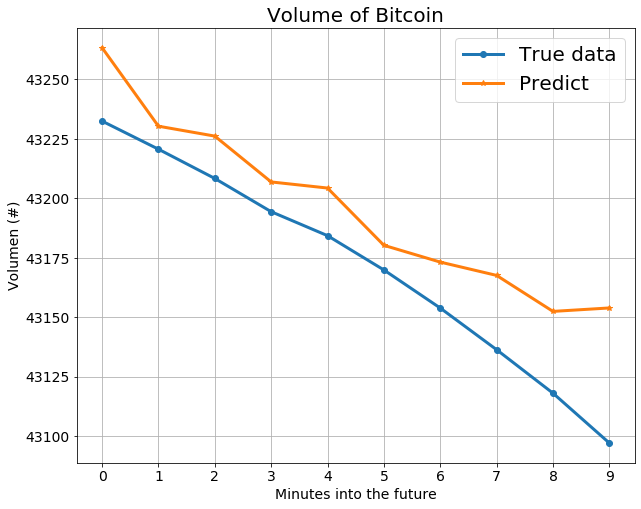

In [124]:
plt.figure(figsize = (10,8))
plt.plot(y_true[:,-3], '-o', label = 'True data', linewidth = 3)
plt.plot(y_pred[:,-3],'-*', label = 'Predict',linewidth = 3)
plt.xlabel('Minutes into the future')
plt.ylabel('VWAP (dollars per trade)')
plt.rc('axes', labelsize = 14)
plt.xticks(range(0,10))
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.grid(True)
plt.title('Volume of Bitcoin', fontsize = 20)
plt.legend(fontsize = 20)

In [96]:
# tunning the hyperparameter now

In [102]:
n_tree = [85, 176, 264, 290, 313, 343, 420, 513, 574]
error = [474, 421, 434,440, 438, 434, 428, 418, 420]

Text(0.5, 1.0, 'Hyperparameter tunning')

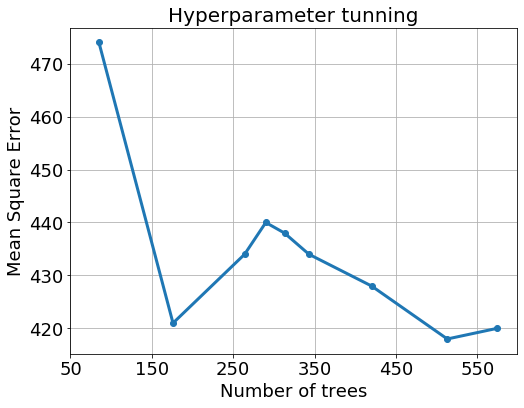

In [116]:

plt.figure(figsize = (8,6))
plt.plot(n_tree, error, '-o', linewidth = 3)
plt.xlabel('Number of trees')
plt.ylabel('Mean Square Error')
plt.rc('axes', labelsize = 18)
plt.xticks(range(50,600, 100))
plt.rc('xtick', labelsize = 18)
plt.rc('ytick', labelsize = 18)
plt.grid(True)
plt.title('Hyperparameter tunning', fontsize = 20)


In [ ]:
# tuning the number of tree estimator

In [ ]:
n_tree = np.random.randint(50,600, 9)

In [ ]:
total_err = []
predictions = []
truth = []
t = time.time()
k = 1
for i in n_tree:  
    print(k)
    
    err, y_pred, y_true = walk_forward_validation(data, 10, cols, i)
    total_err.append(err)
    predictions.append(y_pred)
    truth.append(truth)
    k+=1
    
elapsed = time.time() - t

In [ ]:
elapsed/3600

In [ ]:
# plotting the validataion plot and finding the best
ind = np.argsort(np.array(n_tree))

plt.figure(figsize = (12,6))
plt.plot(n_tree[ind], np.array(total_err)[ind], '-*')


In [ ]:
# after tuning the hyperparameter we now just need to do this for all the stocks and get the error metrics

# this function will grab and tim the

def tim(data):
    
    '''
    This will trim the data to our liking
    data is a dataframe
    '''
    
    
    df['datetime'] = pd.to_datetime(df['timestamp'], unit = 's')

    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['day'] = df['datetime'].dt.day

    #new training datafile
    data = df[(df['year'] >= 2021) & (df['month'] > 8) & (df['day'] > 10)]
    data = data.dropna()
    
    
    


In [ ]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit = 's')

df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day

#new training datafile
data = df[(df['year'] >= 2021) & (df['month'] > 8)& (df['day'] > 10)]
data = data.dropna()


In [ ]:
#new training datafile
data = df[(df['year'] >= 2021) & (df['month'] > 8)& (df['day'] > 10)]
data = data.dropna()



In [ ]:
bitcoin_coin = data[data['Asset_ID'] == 0].rolling(30).mean().dropna()

In [ ]:
cols=['Volume', 'VWAP','Open', 'Target']

bitcoin_coin_ML = series_to_supervised(bitcoin_coin[cols], n_in = 80, n_out = 10)

In [ ]:
# bitcoin_coin_ML.head()

In [ ]:
bitcoin_cash = data[data['Asset_ID'] == 2].rolling(30).mean().dropna()

In [ ]:
bitcoin_cash_ML = series_to_supervised(bitcoin_cash[cols], n_in = 80, n_out = 10)

In [ ]:
EOS_IO = data[data['Asset_ID'] == 5].rolling(30).mean().dropna()

In [ ]:
EOS_IO_ML = series_to_supervised(EOS_IO[cols], n_in = 80, n_out = 10)

In [ ]:
Ethereum_Classic=data[data['Asset_ID'] == 7].rolling(30).mean().dropna()

In [ ]:
Ethereum_Classic_ML = series_to_supervised(Ethereum_Classic[cols], n_in = 80, n_out = 10)

In [ ]:
Ethereum = data[data['Asset_ID'] == 6].rolling(30).mean().dropna()

In [ ]:
Ethereum_ML = series_to_supervised(Ethereum[cols], n_in = 80, n_out = 10)

In [ ]:
Litecoin = data[data['Asset_ID'] == 9].rolling(30).mean().dropna()

In [ ]:
Litecoin_ML = series_to_supervised(Litecoin[cols], n_in = 80, n_out = 10)

In [ ]:
Monero = data[data['Asset_ID'] == 11].rolling(30).mean().dropna()

In [ ]:
Monero_ML = series_to_supervised(Monero[cols], n_in = 100, n_out = 15)

In [ ]:
TRON= data[data['Asset_ID'] == 13].rolling(30).mean().dropna()

In [ ]:
TRON_ML = series_to_supervised(TRON[cols], n_in = 100, n_out = 15)

In [ ]:
Stellar = data[data['Asset_ID'] == 12].rolling(30).mean().dropna()

In [ ]:
Stellar_ML = series_to_supervised(Stellar[cols], n_in = 100, n_out = 15)

In [ ]:
Cardano= data[data['Asset_ID'] == 3].rolling(30).mean().dropna()

In [ ]:
Cardano_ML = series_to_supervised(Cardano[cols], n_in = 100, n_out = 15)

In [ ]:
IOTA= data[data['Asset_ID'] == 8].rolling(30).mean().dropna()

In [ ]:
IOTA_ML = series_to_supervised(IOTA[cols], n_in = 100, n_out = 15)

In [ ]:
Maker= data[data['Asset_ID'] == 10].rolling(30).mean().dropna()

In [ ]:
Maker_ML = series_to_supervised(Maker[cols], n_in = 100, n_out = 15)

In [ ]:
Dogecoin = data[data['Asset_ID'] == 4].rolling(30).mean().dropna()

In [ ]:
Dogecoin_ML = series_to_supervised(Dogecoin[cols], n_in = 100, n_out = 15)

In [ ]:
t = time.time()
bitcoin_cash_ML_err, bitcoin_cash_ML_y_pred, bitcoin_cash_ML_y_true = walk_forward_validation(bitcoin_cash_ML.values, 15, cols, 176)
t2 = time.time() - t





In [ ]:
EOS_IO_ML_err, EOS_IO_ML_y_pred, EOS_IO_ML_y_true = walk_forward_validation(EOS_IO_ML.values, 10, cols, 176)
Ethereum_Classic_ML_err, Ethereum_Classic_ML_y_pred, Ethereum_Classic_ML_y_true = walk_forward_validation(Ethereum_Classic_ML.values, 10, cols, 176)
Ethereum_ML_err, Ethereum_ML_y_pred, Ethereum_ML_y_true = walk_forward_validation(Ethereum_ML.values, 10, cols, 176)
Litecoin_ML_err, Litecoin_ML_y_pred, Litecoin_ML_y_true = walk_forward_validation(Ethereum_Classic_ML.values, 10, cols, 176)
# Monero_ML_err, Monero_ML_y_pred, Monero_ML_y_true = walk_forward_validation(Monero_ML.values, 15, cols, 176)
# TRON_ML_err, TRON_ML_y_pred, TRON_ML_y_true = walk_forward_validation(TRON_ML.values, 15, cols, 176)
# Stellar_ML_err, Stellar_ML_y_pred, Stellar_ML_y_true = walk_forward_validation(Stellar_ML.values, 15, cols, 176)
# Cardano_ML_err, Cardano_ML_y_pred, Cardano_ML_y_true = walk_forward_validation(Cardano_ML.values, 15, cols, 176)
# IOTA_ML_err, IOTA_ML_y_pred, IOTA_ML_y_true = walk_forward_validation(IOTA_ML.values, 15, cols, 176)
# Maker_ML_err, Maker_ML_y_pred, Maker_ML_y_true = walk_forward_validation(Maker_ML.values, 15, cols, 176)
# Dogecoin_ML_err, Dogecoin_ML_y_pred, Dogecoin_ML_y_true = walk_forward_validation(Dogecoin_ML.values, 15, cols, 176)




In [ ]:
cal_tar = lambda x: np.log(x[-1]/x[0])

In [ ]:
print(cal_tar(y_pred[-1]))
print(cal_tar(y_true[-1]))

In [ ]:
data[data['Asset_ID']==1]['Target'].iloc[-1]

In [ ]:
data[data['Asset_ID']==0].head()

In [ ]:
def weighted_correlation(a, b, weights):

    w = np.ravel(weights)
    a = np.ravel(a)
    b = np.ravel(b)

    sum_w = np.sum(w)
    mean_a = np.sum(a * w) / sum_w
    mean_b = np.sum(b * w) / sum_w
    var_a = np.sum(w * np.square(a - mean_a)) / sum_w
    var_b = np.sum(w * np.square(b - mean_b)) / sum_w

    cov = np.sum((a * b * w)) / np.sum(w) - mean_a * mean_b
    corr = cov / np.sqrt(var_a * var_b)

    return corr

In [ ]:
dd =  moving_avg['Open'].to_numpy()

In [ ]:
R = []
for i in range(0, len(dd)-16):
    R.append(np.log(dd[i+16]/dd[i]))



In [ ]:
# we cant do this.... this wont predict anything further in the time, we



#Basecase: simple linear regression with ordinary least squares on bitcoin
#(i) using timestamp, Count, Volume, and VWAP
#result is overfit and tuning selected columns shows that VWAP is an extremely strong predictor of price on its own

cols=['timestamp','Count','Volume','VWAP']

linreg = LinearRegression().fit(bitcoin_trim.loc[:,cols],bitcoin_trim['High'])
print(linreg.coef_)

plt.figure(figsize = (20,10))
plt.title("Linear Regression - Bitcoin", fontsize=25)

plt.plot('datetime','High',data=bitcoin_trim)
plt.plot(bitcoin_trim['datetime'],linreg.predict(bitcoin_trim.loc[:,cols]),label='Linear Regression')
plt.xlabel('Date',fontsize = 25)
plt.xticks(fontsize = 20)
plt.ylabel('High',fontsize = 25)
plt.yticks(fontsize = 20)

plt.legend(loc = 'upper left',fontsize=20);

In [ ]:
#(ii) using the highs of all other cryptocurrencies
#result is 

dat = data[data['Asset_ID']==0]
temp = dat[['High']].values
dat = pd.DataFrame(temp)
dat.columns=['crypto 0']

print(dat)

for i in range(1,14):
    tempdat=(data[data['Asset_ID']==i])
    tempdat2=tempdat[['High']].values
    tempdat=pd.DataFrame(tempdat2)
    print(tempdat)
    dat.insert(i,'crypto '+ str(i),tempdat2)
    
Y_train = training_set[['label']].values    

print(dat.head())

datBitcoin = dat.iloc[:,1]
dat.drop(dat.columns[1], axis=1, inplace=True)

print(dat)

linreg = LinearRegression().fit(dat,datBitcoin)
print(linreg.coef_)

plt.figure(figsize = (20,10))
plt.title("Linear Regression - Bitcoin", fontsize=25)

plt.plot('datetime','High',data=bitcoin_trim)
plt.plot(bitcoin_trim['datetime'],linreg.predict(bitcoin_trim.loc[:,cols]))
plt.xlabel('Date',fontsize = 25)
plt.xticks(fontsize = 20)
plt.ylabel('High',fontsize = 25)
plt.yticks(fontsize = 20)